In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, mean_absolute_error
from pathlib import Path
from keras.models import load_model

from config import config
from src.trading_evaluation.model_evaluation import evaluate_and_plot
from src.trading_evaluation.granger_causality import granger_causality_tests


df_btc = pd.read_csv(
    config.DATA_DIR / "processed" / "crypto_prices" / "btc_original.csv",
    parse_dates=["date"],
    index_col="date",
)
df_eth = pd.read_csv(
    config.DATA_DIR / "processed" / "crypto_prices" / "eth_original.csv",
    parse_dates=["date"],
    index_col="date",
)

# load predictions
y_pred_btc = pd.read_csv(
    config.DATA_DIR
    / "predictions"
    / "multi_source_data"
    / "log_price_change_predictions_btc.csv",
    parse_dates=["date"],
    index_col="date",
)
y_pred_eth = pd.read_csv(
    config.DATA_DIR
    / "predictions"
    / "multi_source_data"
    / "log_price_change_predictions_eth.csv",
    parse_dates=["date"],
    index_col="date",
)

In [2]:
# slice original df with index of pred
df_btc = df_btc.loc[y_pred_btc.index]
df_eth = df_eth.loc[y_pred_eth.index]

# Model Evaluation


BTC - MSE: 0.0024
BTC - MAE: 0.0355


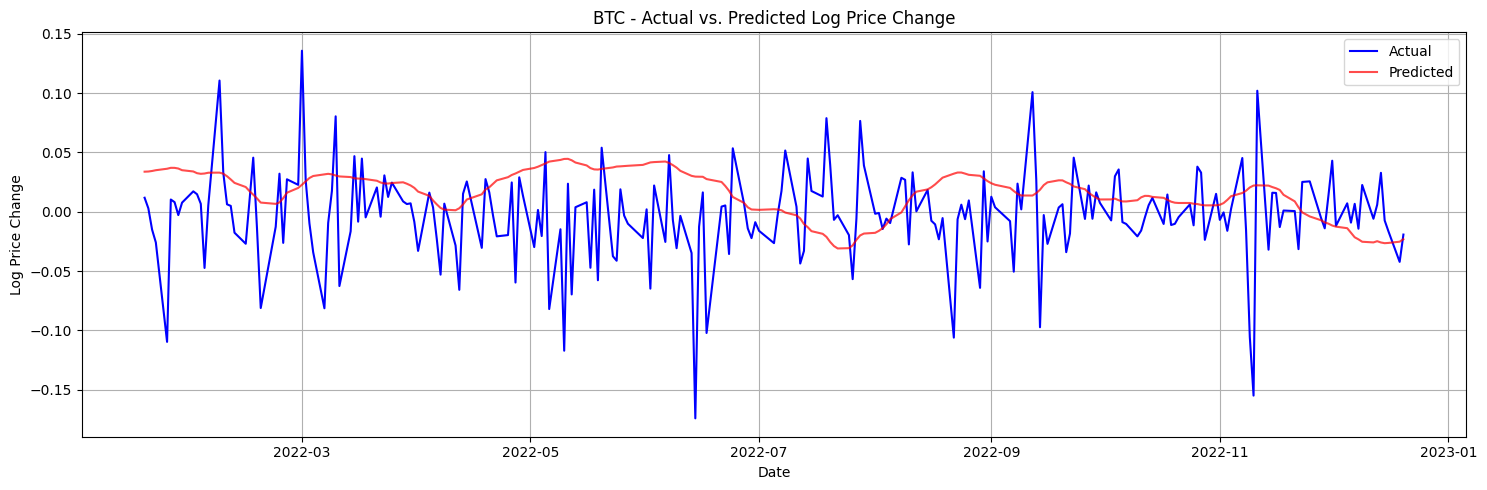

ETH - MSE: 0.0025
ETH - MAE: 0.0362


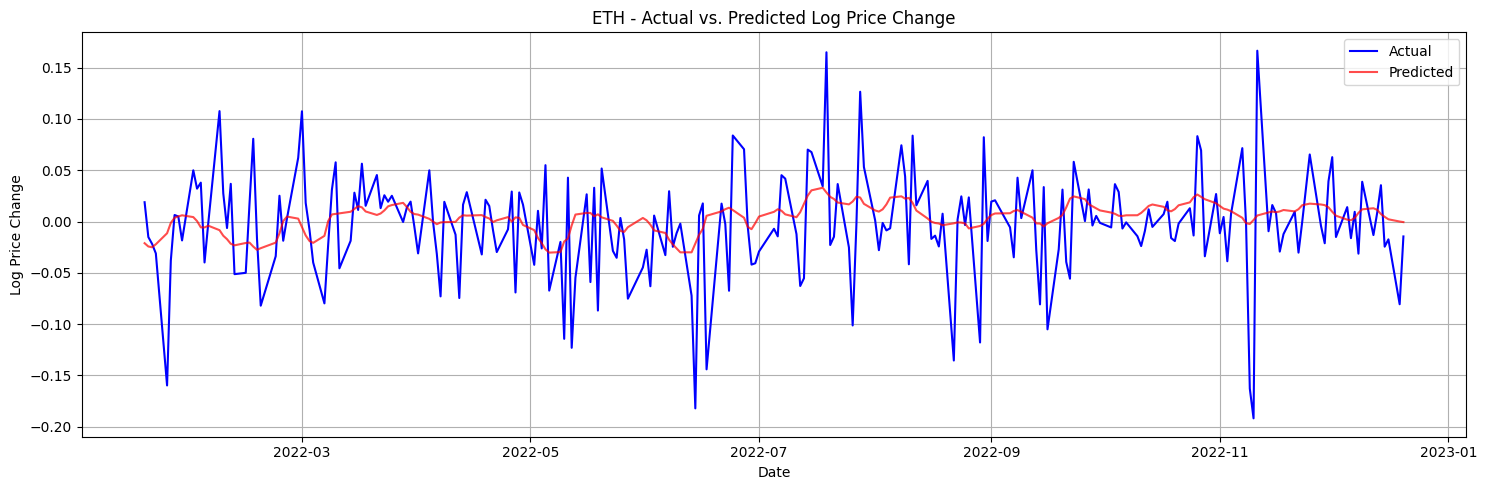

In [3]:
mse_btc, mae_btc = evaluate_and_plot(
    df_btc, y_pred_btc, "logPriceChange", "predictedLogPriceChange", "BTC"
)
mse_eth, mae_eth = evaluate_and_plot(
    df_eth, y_pred_eth, "logPriceChange", "predictedLogPriceChange", "ETH"
)

## Granger Causality


in order to understand which feature was more "influential" to the target, we'll look at how much each feature's history causes changes in the target


In [4]:
granger_results_btc = granger_causality_tests(
    df_btc, "BTC", "logPriceChange", max_lag=30
)
granger_results_eth = granger_causality_tests(
    df_eth, "ETH", "logPriceChange", max_lag=30
)


Granger Causality Test for BTC 'logPriceChange's
--------------------------------------------------
✗ open (best p=2.75e-01)
✗ high (best p=1.49e-01)
✗ low (best p=3.49e-01)
✗ close (best p=3.60e-01)
✓ volume (lag 3, p=3.26e-02)
✗ marketCap (best p=3.53e-01)
✗ EMA_12 (best p=3.96e-01)
✗ EMA_26 (best p=4.26e-01)
✗ BB_Middle (best p=4.48e-01)
✓ BB_Upper (lag 23, p=1.07e-02)
✗ BB_Lower (best p=4.18e-01)
✗ OBV (best p=1.62e-01)
✗ KAMA (best p=3.86e-01)
✗ PPO (best p=2.92e-01)
✗ PPO_Signal (best p=5.97e-01)
✗ PVO (best p=9.70e-02)
✓ PVO_Signal (lag 23, p=2.18e-02)
✓ RSI (lag 29, p=2.07e-02)
✗ TSI (best p=8.77e-02)
✗ Ultimate_Oscillator (best p=2.05e-01)
✗ ADI (best p=4.20e-01)
✗ CMF (best p=1.77e-01)
✗ EMV (best p=1.02e-01)
✗ FI (best p=8.63e-01)
✗ NVI (best p=4.46e-01)
✗ VPT (best p=5.67e-02)
✗ BBM (best p=1.92e-01)
✗ BBW (best p=1.35e-01)
✗ DCM (best p=4.24e-01)
✗ DCW (best p=1.80e-01)
✗ KCM (best p=4.16e-01)
✗ KCW (best p=5.80e-01)
✗ UI (best p=2.05e-01)
✗ Aroon_down (best p=3.01e-01)
✗